In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
</style>
""")

# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{Summer 2020}$$

## $$\text{Exam preparation session} $$

#### $$\text{Sergej Dogadov} \quad \text{Philine Thalia Görzig} \quad \text{Panagiotis Tomer Karagiannis}$$

<center>
<img src='images/pyt.png' width=250>

## $$\textbf{Exercice 1: Code understanding ( 5 x 5 = 25 Points )}$$
<hr>
<br> 

<br>

In this exercise, you are given existing codes and need to determine their output. In your answers, make sure
to distinguish between different types like integers, strings and floats by using quotes, suffix “.0” and etc.
Output for the first line is given as an example.

In [2]:
#Example
print( [int(1),float(1),str(1)] )

[1, 1.0, '1']


## $$\textbf{Exercise 1.1: Types}$$
<hr>
<br> 

In [9]:
# Given expression

print( [-0.5*2**4, str(643)[-2]] + [ tuple(2*[3]), (0 != 1) == True] ) 

[-8.0, '4', (3, 3), True]


## $$\textbf{Exercise 1.2: Functions}$$
<hr>
<br>

In [62]:
# Given a function

def pmae(X, Y, p=0.5):
    sm = 0
    for n,x in enumerate(X,10): # ['d', 34, (32,4)]  n = 10,11,12,...
        sm += abs(x - Y[n])
    sm /= (n+1)
    return tuple([sm**p, p])

In [64]:
# What is the output

args = ([1,-2, 3],[-5, 8, -8], 2)
print(pmae(*args))

(45.5625, 2)


## $$\textbf{Exercise 1.3: Broadcasting}$$
<hr>
<br>

In [4]:
import numpy as np

X = np.arange(-2,10,4).reshape((1, 3)) #-2,2,6
Y = np.array([1,2,3])**2 
Y = Y[:,None] 

# What is the output
print(0.5*X + Y)

[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 8. 10. 12.]]


## $$\textbf{Exercise 1.4: Dictionaries}$$
<hr>
<br>

In [5]:
D = dict([(0,1), ('1',2), ('2',6), (3,6), (.1,10)])

res = 0

for k in D:

    if type(k) == str:
        res += int(k)
    elif type(k) == int:
        res += D[k]
    else:
        res /= len(D)
        
print(res) # 1, 2, 4, 10/5 = 2.0

2.0


## $$\textbf{Exercise 1.5: Classes}$$
<hr>
<br>

In [16]:
# Class is given what is the output

class Bernoulli():
    
    def fit(self, X):
        conv = lambda x: 1 if x == 'H' else 0
        res = [conv(x) for x in X]
        print(res)
        self.p = sum(res)/len(res)
        print(self.p)
        
    def info(self):
        dec = False
        if self.p < 0.6 and self.p > 0.4:
            dec = True
        return f"The coin is fair:{ dec } p={self.p:.3f}"
    
B = Bernoulli()

B.fit(['H','H','H','T','H','T','T','H','T','T'])

print(B.info())

[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
0.5
The coin is fair:True p=0.500


## $$\textbf {Exercise 2: Plotting ( 25 Points )}$$
<hr>
<br>

Write code that reproduces the plot shown below. The data for the depicted plot should be generated
from two Gaussian distributions using numpy random package.

<center>
<img src="./images/plt.jpg", width='800'/>
</center>

## $$\textbf {Exercise 2.1: Data generation}$$
<hr>
<br>

Generate two numpy arrays $G$ and $K$ from the normal (Gaussian) distribution
with means $-1$ and $1$ correspondingly and variance = 1 with $500$ elements each.
Compute emperical means of the generated data for both of the arrays. Round the results to two diguts after the point.

In [65]:
# Solution

from numpy.random import normal as gauss
np.random.seed(42)

G = gauss(-1,1,500)
K = gauss( 1,1,500)

mu_G = np.round(G.mean(0),2)
mu_K = np.round(K.mean(0),2)

labels = np.ones(G.shape[0] + K.shape[0])
labels[:G.shape[0]] = 0

print(mu_G, mu_K, labels.shape)

-0.99 1.03 (1000,)


## $$\textbf {Exercise 2.2: Data generation}$$
<hr>
<br>

Create a dictionary D with keys green and black and store the two generated
arrays using the keys accordingly.

In [18]:
D = dict()
colors = np.array(['green','black'])
                  

D[colors[0]] = G
D[colors[1]] = K

## $$\textbf {Exercise 2.3: Matplotlib}$$
<hr>
<br>

Prepare the plot (plot size is 8 by 6, axis names, title and grids parallel to the y-axis):

No handles with labels found to put in legend.


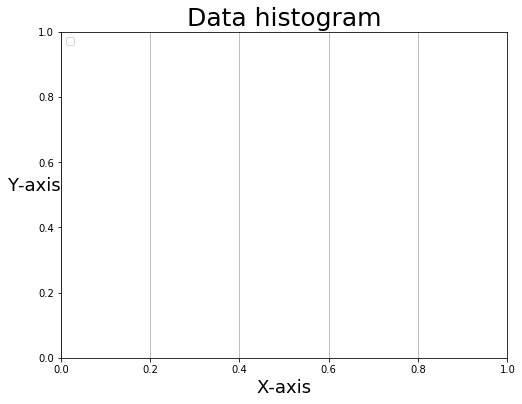

In [25]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(8,6))

plt.title('Data histogram', fontsize=25)
plt.xlabel('X-axis', fontsize=18)
plt.ylabel('Y-axis', rotation=0, fontsize=18)

plt.yticks(np.arange(0,1.1,0.2))

plt.grid(axis='x')

_=plt.legend(loc = 'upper left')

Plot the histogram plot (bins=50) with means as the dotted line through
the histogram blocks (line widht is 4, color red ). Set transparency value for black block equal 30%. The
height of the mean lines should be maximum of the elements in each block.

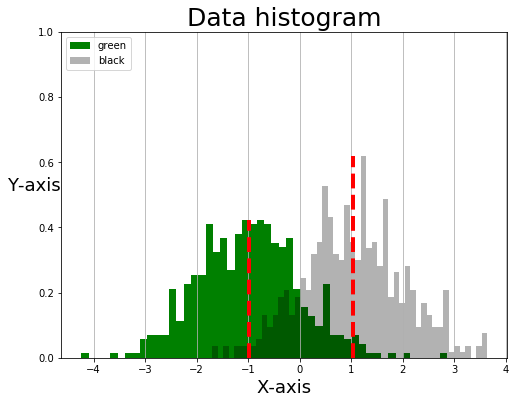

In [31]:

# Expected code
f = plt.figure(figsize=(8,6))
plt.title('Data histogram', fontsize=25)

nums, _ , _ = plt.hist(G, bins=50, label='green', color='g',density=True)
g_max = np.max(nums)

args = ([mu_G,mu_G],[0, g_max])

plt.plot(*args, ls='--', linewidth=4, c='r')
nums, _ , _ = plt.hist(K, bins=50, label='black', color='k', alpha=0.3, density=True)
k_max = np.max(nums)
args = ([mu_K,mu_K],[0, k_max])
_=plt.plot(*args, ls='--', linewidth=4, c='r')

plt.xlabel('X-axis', fontsize=18)
plt.ylabel('Y-axis', rotation=0, fontsize=18)
plt.yticks(np.arange(0,1.1,0.2))
plt.grid(axis='x')
plt.legend(loc = 'upper left')

## $$\textbf {Exercise 3: Numpy Acceleration ( 5 + 10 + 10 = 25 P )}$$
<hr>
<br> 

Functions ***slow1, slow2, slow3*** are written in pure Python and therefore slow and difficult to read. Write
their numpy-accelerated counterparts (they should produce the same output, but run much faster and be
more compact and readable). Input to these functions, where required, can be assumed to be numpy arrays.
No further packages (e.g. sklearn, panda, etc...) are allowed !

## $$\textbf {Exercise 3.1: Rows and Matrices}$$
<hr>
<br>  

In [69]:
def slow1(X):
    n,m = X.shape
    D = np.empty_like(X)
    D[0] = [x**2 for x in X[1]]
    for i in range(m):
        D[1,i] = abs(D[0,i]-X[1,i])
    return D

In [70]:
X = np.arange(10).reshape(2,5)
print(X)
slow1(X)

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[25, 36, 49, 64, 81],
       [20, 30, 42, 56, 72]])

## $$\textbf {Solution 3.1: Rows and Matrices}$$
<hr>
<br>   

In [71]:
def fast1(X):
    D = np.empty_like(X)
    D[0] = X[1]**2
    D[1] = np.abs(D[0] - X[1])
    return D

In [73]:
assert np.isclose(np.sum(slow1(X) - fast1(X)), 0 )

## $$\textbf {Exercise 3.2: Columns and Mean over an axis}$$
<hr>
<br>   

In [56]:
def slow2(X):
    N,d = X.shape
    for j in range(d):
        s = 0
        for i in range(N):
            s += X[i,j]
        for i in range(N):
            X[i,j] -= s/N
    return X

In [57]:
D = np.arange(12.).reshape(3,4)
D[0,1] = 7
X = np.copy(D)
slow2(X)

array([[-4.,  0., -4., -4.],
       [ 0., -2.,  0.,  0.],
       [ 4.,  2.,  4.,  4.]])

## $$\textbf {Solution 3.2: Columns and Mean over an axis}$$
<hr>
<br>   

In [75]:
def fast2(X):
    N,d = X.shape
    m = X.mean(0) # 1,4
    X -= m # (3,4) - (1,4)
    return X

In [76]:
X = np.copy(D)
print(X)
np.sum( slow2(X) - fast2(X))

[[ 0.  7.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


0.0

## $$\textbf {Exercise 3.3: log plus one Distance}$$
<hr>
<br>   

In [77]:
import numpy as np
from math import log

def slow3(X, C):
    N, f = X.shape
    M, f = C.shape
    D = np.zeros((N, M))
    for n in range(N):
        for m in range(M):
            for k in range(f):
                a,b = X[n,k], C[m,k]
                D[n,m] += abs(a - b)
                
    for n in range(N):
        for m in range(M):
            D[n,m] = log(1 + D[n,m])
    return D

## $$\textbf { Solution 3.3: log plus one Distances}$$
<hr>
<br>   

In [78]:
# Expected code

C = np.arange(8).reshape(2,4)
print(X.shape, C.shape)

def fast3(X,C):
    #    (3,1,4)   (1,2,4)
    D = np.abs(X[:,None] - C[None]) # (3,2,4)
    # (3,2)
    D = D.sum(2)
    return np.log(1 + D)

(3, 4) (2, 4)


In [79]:
assert np.isclose(np.sum(slow3(X,C) - fast3(X,C)),0)

## $$\textbf {Exercise 4: Random Walks (5 + 10 + 10 = 25 P)}$$
<hr>

A robotic vacuum cleaner
moves randomly between
rooms of an apartment
shown below. We would like
to simulate its path.

<center>
<img src='./images/sim.png' width=500/>
</center>

## $$\textbf {Exercise 4.1: Transition model}$$
<hr>


Build the transition model between states {A,B,C,D} (e.g. a Python dictionary)
Store the actual room names (lobby, kitchen, etc...):

In [59]:
# Expected solution

T = {'A': 'BCD', 'B':'AC', 'C':'AB','D':'A'}
names = {'A': 'lobby', 'B':'kitchen','C':'bedroom','D':'bathroom'}

## $$\textbf {Exercise 4.2: Transition simulation}$$
<hr>

Simulate the system for 1000 iterations and record the sequence of visited states (we start in
the lobby, and transition to each connected state has equal probability):

In [80]:
# Expected solution

import random
states = ['A']

for _ in range(1000):
    C = random.choice(T[states[-1]])
    states.append(C)
    
print(states[:10])

['A', 'C', 'B', 'C', 'B', 'A', 'B', 'C', 'A', 'D']


## $$\textbf {Exercise 4.3: Simulation evaluation}$$
<hr>

Write code that finds in which state the robot has spent the least amount of time and print the actual room name (lobby, kitchen, etc...):

In [61]:
# Expected solution

state_min = None
n_min = float('inf')

for X in T.keys():
    n = np.sum(np.array(states) == X)
    if n < n_min:
        state_min = X
        n_min = n

print(names[state_min])

bathroom


$$\ln{x^2} = 2\ln{x}$$ 

In [99]:
fun(1,3)

2


6